# Example 2: -  Analyzing dim6 operators in WBF 

## Preparations

Let us first load all the python libraries again

In [1]:
import sys
import os
madminer_src_path = "/Users/felixkling/Documents/GitHub/madminer"
sys.path.append(madminer_src_path)

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.fisherinformation import project_information,profile_information

from madminer.plotting import plot_fisher_information_contours_2d

from madminer.sampling import SampleAugmenter
from madminer.sampling import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from madminer.ml import MLForge, EnsembleForge

from sklearn.metrics import mean_squared_error

To not forget anything later, let us globaly define the number of events in the MG sample

In [2]:
inputfile_sb = 'data/madminer_lhedata.h5'
nsamples_sb = 200000

inputfile_s = 'data/madminer_lhedata_wbf_signal.h5'
nsamples_s = 100000

## 5. Obtaining the Fisher Information using Machine Learning

### 5a) Make (unweighted) training and test samples with augmented data

Let us make event samples, both for signal only and signal + background 

In [3]:
#Define n_estimator
n_estimators = 5

#Initialize
sa_sb = SampleAugmenter(inputfile_sb, debug=False)
sa_s  = SampleAugmenter(inputfile_s , debug=False)


#augment train sample
for i in range(n_estimators):
    _ , _ , _ = sa_sb.extract_samples_train_local(
        theta=constant_benchmark_theta('sm'), n_samples=int(nsamples_sb/2),
        folder='./data/samples_ensemble_sb/', filename='train{}'.format(i)
    )
    _ , _ , _ = sa_s.extract_samples_train_local(
        theta=constant_benchmark_theta('sm'), n_samples=int(nsamples_s/2),
        folder='./data/samples_ensemble_s/', filename='train{}'.format(i)
    )

#augment test sample
_ , _ = sa_sb.extract_samples_test(
    theta=constant_benchmark_theta('sm'), n_samples=int(nsamples_sb/2),
    folder='./data/samples_ensemble_sb/', filename='test'
)
_ , _ = sa_s.extract_samples_test(
    theta=constant_benchmark_theta('sm'), n_samples=int(nsamples_s/2),
    folder='./data/samples_ensemble_s/', filename='test'
)

08:56  
08:56  ------------------------------------------------------------
08:56  |                                                          |
08:56  |  MadMiner v0.1.1                                         |
08:56  |                                                          |
08:56  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
08:56  |                                                          |
08:56  ------------------------------------------------------------
08:56  
08:56  Loading data from data/madminer_lhedata.h5
08:56  Found 2 parameters:
08:56     FW (LHA: anoinputs 3, maximal power in squared ME: (2,), range: (-10.0, 10.0))
08:56     FWW (LHA: anoinputs 7, maximal power in squared ME: (2,), range: (-10.0, 10.0))
08:56  Found 6 benchmarks:
08:56     sm: FW = 0.00e+00, FWW = 0.00e+00
08:56     w: FW = 2.00, FWW = 2.00
08:56     morphing_basis_vector_2: FW = 2.14, FWW = -8.58e+00
08:56     morphing_basis_vector_3: FW = -5.61e+00, FWW = -6.12e+00
08:56     morphin

### 5b)  Train a neural network to estimate the score

In [4]:
ensemble_sb = EnsembleForge(estimators=n_estimators)
ensemble_sb.train_all(
    method='sally',
    x_filename=['data/samples_ensemble_sb/x_train{}.npy'.format(i) for i in range(n_estimators)],
    t_xz0_filename=['data/samples_ensemble_sb/t_xz_train{}.npy'.format(i) for i in range(n_estimators)]
)
ensemble_sb.save('models/samples_ensemble_sb')


ensemble_s = EnsembleForge(estimators=n_estimators)
ensemble_s.train_all(
    method='sally',
    x_filename=['data/samples_ensemble_s/x_train{}.npy'.format(i) for i in range(n_estimators)],
    t_xz0_filename=['data/samples_ensemble_s/t_xz_train{}.npy'.format(i) for i in range(n_estimators)]
)
ensemble_s.save('models/samples_ensemble_s')

08:56  Training 5 estimators in ensemble
08:56  Training estimator 1 / 5 in ensemble
08:56  Starting training
08:56    Method:                 sally
08:56    Training data: x at data/samples_ensemble_sb/x_train0.npy
08:56                   t_xz (theta0) at  data/samples_ensemble_sb/t_xz_train0.npy
08:56    Features:               all
08:56    Method:                 sally
08:56    Hidden layers:          (100, 100)
08:56    Activation function:    tanh
08:56    Batch size:             128
08:56    Trainer:                amsgrad
08:56    Epochs:                 50
08:56    Learning rate:          0.001 initially, decaying to 0.0001
08:56    Validation split:       None
08:56    Early stopping:         True
08:56    Scale inputs:           True
08:56    Shuffle labels          False
08:56    Regularization:         None
08:56  Loading training data
08:56  Found 100000 samples with 2 parameters and 41 observables
08:56  Rescaling inputs
08:56  Creating model for method sally
08:56  Train

09:04    Hidden layers:          (100, 100)
09:04    Activation function:    tanh
09:04    Batch size:             128
09:04    Trainer:                amsgrad
09:04    Epochs:                 50
09:04    Learning rate:          0.001 initially, decaying to 0.0001
09:04    Validation split:       None
09:04    Early stopping:         True
09:04    Scale inputs:           True
09:04    Shuffle labels          False
09:04    Regularization:         None
09:04  Loading training data
09:04  Found 50000 samples with 2 parameters and 41 observables
09:04  Rescaling inputs
09:04  Creating model for method sally
09:04  Training model
09:04    Epoch 5: train loss 0.0003 (mse_score: 0.0003)
09:04    Epoch 10: train loss 0.0002 (mse_score: 0.0002)
09:04    Epoch 15: train loss 0.0001 (mse_score: 0.0001)
09:04    Epoch 20: train loss 0.0001 (mse_score: 0.0001)
09:05    Epoch 25: train loss 0.0001 (mse_score: 0.0001)
09:05    Epoch 30: train loss 0.0001 (mse_score: 0.0001)
09:05    Epoch 35: train 

### 5c) Evaluate Fisher Information

09:08  Loading data from data/madminer_lhedata.h5
09:08  Found 2 parameters:
09:08     FW (LHA: anoinputs 3, maximal power in squared ME: (2,), range: (-10.0, 10.0))
09:08     FWW (LHA: anoinputs 7, maximal power in squared ME: (2,), range: (-10.0, 10.0))
09:08  Found 6 benchmarks:
09:08     sm: FW = 0.00e+00, FWW = 0.00e+00
09:08     w: FW = 2.00, FWW = 2.00
09:08     morphing_basis_vector_2: FW = 2.14, FWW = -8.58e+00
09:08     morphing_basis_vector_3: FW = -5.61e+00, FWW = -6.12e+00
09:08     morphing_basis_vector_4: FW = -6.05e+00, FWW = 9.47
09:08     morphing_basis_vector_5: FW = -7.78e+00, FWW = 0.21
09:08  Found 41 observables: pt_jhard, pt_jsoft, dphijj, m_aa, m_jj, m_jjaa, deta_jj, px_j1, px_j2, px_a1, px_a2, px_h, py_j1, py_j2, py_a1, py_a2, py_h, pz_j1, pz_j2, pz_a1, pz_a2, pz_h, en_j1, en_j2, en_a1, en_a2, en_h, pt_j1, pt_j2, pt_a1, pt_a2, pt_h, eta_j1, eta_j2, eta_a1, eta_a2, eta_h, dphi_j1j2, dphi_a1a2, dphi_j1h, dphi_j2h
09:08  Found 200000 events
09:08  Found morphing 

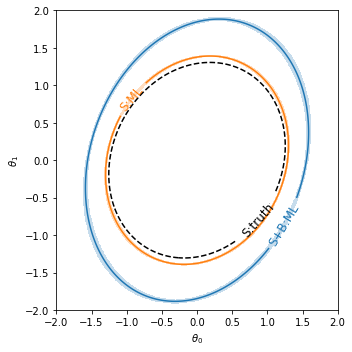

In [5]:
fisher_sb = FisherInformation(inputfile_sb, debug=False)
fisher_s  = FisherInformation(inputfile_s , debug=False)

fi_ml_mean_sb, fi_ml_covariance_sb = fisher_sb.calculate_fisher_information_full_detector(
    theta=[0.,0.],
    model_file='models/samples_ensemble_sb',
    unweighted_x_sample_file='data/samples_ensemble_sb/x_test.npy',
    luminosity=300*1000.
)

fi_ml_mean_s, fi_ml_covariance_s = fisher_s.calculate_fisher_information_full_detector(
    theta=[0.,0.],
    model_file='models/samples_ensemble_s',
    unweighted_x_sample_file='data/samples_ensemble_s/x_test.npy',
    luminosity=300*1000.
)

fi_truth_mean_s, fi_truth_covariance_s = fisher_s.calculate_fisher_information_full_truth(
    theta=[0.,0.],
    luminosity=300*1000.
)

_ = plot_fisher_information_contours_2d(
    [fi_ml_mean_sb, fi_ml_mean_s, fi_truth_mean_s ],
    [fi_ml_covariance_s, fi_ml_covariance_s, fi_truth_covariance_s],
    colors=[u'C0',u'C1',"black"],
    linestyles=["solid","solid","dashed"],
    inline_labels=["S+B:ML","S:ML","S:truth"],
    xrange=(-2,2),
    yrange=(-2,2)
)

## 6. Cross-Check: Validating score estimation

Let us now validate that the Machine Learning works. The central object consideres here is the score, so we will compare the truth level score with the estimated scores.  

### 6a) Run the Data Augmentation and Machine Learning part

First, we once again augment the dataand machine learning part again.

In [6]:
sa = SampleAugmenter(inputfile_sb, debug=False)

x, theta, t_xz = sa.extract_samples_train_local(
    theta=constant_benchmark_theta('sm'),
    n_samples=int(nsamples_sb/2),
    folder='./data/samples_scores/',
    test_split=None,
    filename='train'
)

x, theta, t_xz = sa.extract_samples_train_local(
    theta=constant_benchmark_theta('sm'),
    n_samples=int(nsamples_sb/2),
    folder='./data/samples_scores/',
    test_split=None,
    filename='test',
    switch_train_test_events=True
)

09:09  Loading data from data/madminer_lhedata.h5
09:09  Found 2 parameters:
09:09     FW (LHA: anoinputs 3, maximal power in squared ME: (2,), range: (-10.0, 10.0))
09:09     FWW (LHA: anoinputs 7, maximal power in squared ME: (2,), range: (-10.0, 10.0))
09:09  Found 6 benchmarks:
09:09     sm: FW = 0.00e+00, FWW = 0.00e+00
09:09     w: FW = 2.00, FWW = 2.00
09:09     morphing_basis_vector_2: FW = 2.14, FWW = -8.58e+00
09:09     morphing_basis_vector_3: FW = -5.61e+00, FWW = -6.12e+00
09:09     morphing_basis_vector_4: FW = -6.05e+00, FWW = 9.47
09:09     morphing_basis_vector_5: FW = -7.78e+00, FWW = 0.21
09:09  Found 41 observables: pt_jhard, pt_jsoft, dphijj, m_aa, m_jj, m_jjaa, deta_jj, px_j1, px_j2, px_a1, px_a2, px_h, py_j1, py_j2, py_a1, py_a2, py_h, pz_j1, pz_j2, pz_a1, pz_a2, pz_h, en_j1, en_j2, en_a1, en_a2, en_h, pt_j1, pt_j2, pt_a1, pt_a2, pt_h, eta_j1, eta_j2, eta_a1, eta_a2, eta_h, dphi_j1j2, dphi_a1a2, dphi_j1h, dphi_j2h
09:09  Found 200000 events
09:09  Found morphing 

Next, we use the perform the ML part, but with only one sample. We therefore use `MLForge` instead of `EnsembleForge`

In [7]:
forge = MLForge()
forge.train(
    method='sally',
    x_filename='./data/samples_scores/x_train.npy',
    t_xz0_filename='./data/samples_scores/t_xz_train.npy'
)
forge.save('models/samples_scores')

09:09  Starting training
09:09    Method:                 sally
09:09    Training data: x at ./data/samples_scores/x_train.npy
09:09                   t_xz (theta0) at  ./data/samples_scores/t_xz_train.npy
09:09    Features:               all
09:09    Method:                 sally
09:09    Hidden layers:          (100, 100)
09:09    Activation function:    tanh
09:09    Batch size:             128
09:09    Trainer:                amsgrad
09:09    Epochs:                 50
09:09    Learning rate:          0.001 initially, decaying to 0.0001
09:09    Validation split:       None
09:09    Early stopping:         True
09:09    Scale inputs:           True
09:09    Shuffle labels          False
09:09    Regularization:         None
09:09  Loading training data
09:09  Found 100000 samples with 2 parameters and 41 observables
09:09  Rescaling inputs
09:09  Creating model for method sally
09:09  Training model
09:09    Epoch 5: train loss 0.0008 (mse_score: 0.0008)
09:09    Epoch 10: train lo

### 6b) Obtain scores

In [8]:
#True score
t_truth_train=np.load('./data/samples_scores/t_xz_train.npy')
t_truth_test=np.load('./data/samples_scores/t_xz_test.npy')

#ML score 
t_ml_train=forge.evaluate('./data/samples_scores/x_train.npy')
t_ml_test=forge.evaluate('./data/samples_scores/x_test.npy')

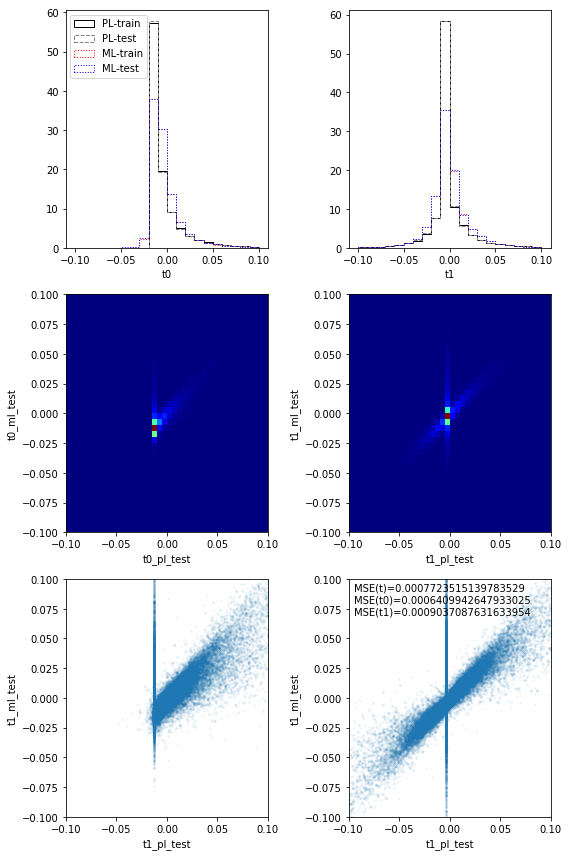

In [11]:
#######
#Figure
myrange=(-.1,.1)
myrangex=[-.1,.1]
f, ((ax11, ax12),(ax21, ax22),(ax31, ax32)) = plt.subplots(3, 2)
f.set_size_inches(8,12)

#######
#Distributions
mynbins=20

#t0
ax11.set_xlabel('t0')
ax11.hist(t_truth_train[:,0], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Black', linestyle='solid', label='PL-train'
        )
ax11.hist(t_truth_test[:,0], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Gray', linestyle='dashed', label='PL-test'
        )
ax11.hist(t_ml_train[:,0], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Red', linestyle='dotted',label='ML-train'
        )
ax11.hist(t_ml_test[:,0], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Blue', linestyle='dotted',label='ML-test'
        )
ax11.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.)

#t1
ax12.set_xlabel('t1')
ax12.hist(t_truth_train[:,1], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Black', linestyle='solid'
        )
ax12.hist(t_truth_test[:,1], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Gray', linestyle='dashed', 
        )
ax12.hist(t_ml_train[:,1], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Red', linestyle='dotted'
        )
ax12.hist(t_ml_test[:,1], 
         range=myrange, bins=mynbins, normed=True,
         histtype='step', color='Blue', linestyle='dotted'
        )

#######
#Density
ax21.hist2d(t_truth_test[:,0], t_ml_test[:,0], bins=(40, 40), range=(myrange,myrange) ,cmap='jet')
ax21.set_xlabel('t0_pl_test')
ax21.set_ylabel('t0_ml_test')

ax22.hist2d(t_truth_test[:,1], t_ml_test[:,1], bins=(40, 40), range=(myrange,myrange) ,cmap='jet')
ax22.set_xlabel('t1_pl_test')
ax22.set_ylabel('t1_ml_test')

#######
#MSE
mse_0 = mean_squared_error(t_truth_test[:,0],t_ml_test[:,0])
mse_1 = mean_squared_error(t_truth_test[:,1],t_ml_test[:,1])
mse_x = mean_squared_error(t_truth_test,t_ml_test)

#######
#Scatter
ax31.scatter(t_truth_test[:,0], t_ml_test[:,0],s=3,alpha=0.05)
ax31.set_xlabel('t1_pl_test')
ax31.set_ylabel('t1_ml_test')
ax31.set_xlim(myrangex)
ax31.set_ylim(myrangex)

ax32.scatter(t_truth_test[:,1], t_ml_test[:,1],s=3,alpha=0.05)
ax32.set_xlabel('t1_pl_test')
ax32.set_ylabel('t1_ml_test')
ax32.set_xlim(myrangex)
ax32.set_ylim(myrangex)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.95*(myrange[1]-myrange[0]), 'MSE(t)='+str(mse_x), fontsize=10)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.90*(myrange[1]-myrange[0]), 'MSE(t0)='+str(mse_0), fontsize=10)
plt.text(myrange[0]+0.025*(myrange[1]-myrange[0]), myrange[0]+0.85*(myrange[1]-myrange[0]), 'MSE(t1)='+str(mse_1), fontsize=10)

#######
#Plot
plt.tight_layout()
plt.show()

### 6c) Kinematic distribution of scores 

We can also look at kinematic distribution of scores

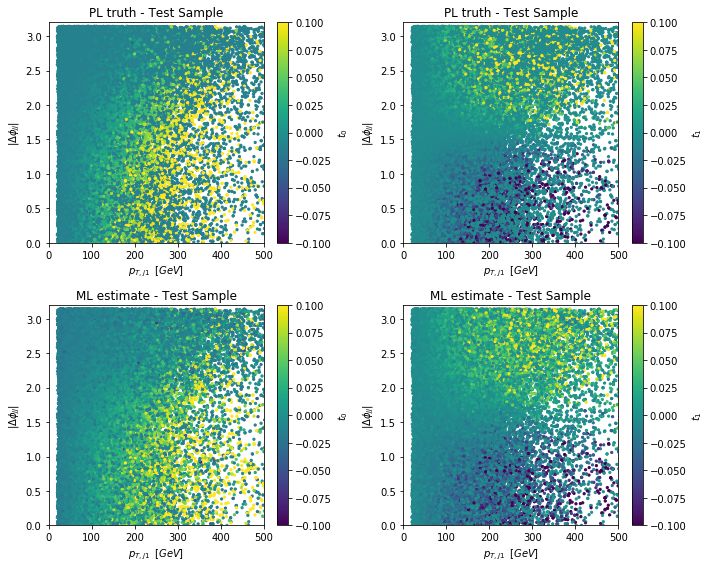

In [10]:
#Which pbservables to show

x_test=np.load('./data/samples_scores/x_test.npy')[:,0]
y_test=np.load('./data/samples_scores/x_test.npy')[:,2]
x_name='$p_{T,j1}\;\;[GeV]$'
y_name='$|\Delta\phi_{jj}|$'
x_range=[0,500]
y_range=[0,3.2]
v_range=[-.1,.1]
t_pl_test=np.load('./data/samples_scores/t_xz_test.npy')
t_ml_test=forge.evaluate('./data/samples_scores/x_test.npy')

#######
#Figure
marker_size=5
f, ((ax11, ax12),(ax21, ax22)) = plt.subplots(2, 2)
f.set_size_inches(10,8)

# t0 PL test
im11=ax11.scatter(x_test, y_test, marker_size, c=t_pl_test[:,0],vmin=v_range[0],vmax=v_range[1])
ax11.set_title("PL truth - Test Sample")
ax11.set_xlabel(x_name)
ax11.set_ylabel(y_name)
ax11.set_xlim(x_range)
ax11.set_ylim(y_range)
cb11=f.colorbar(im11, ax=ax11)
cb11.set_label("$t_0$")

# t1 PL test
im12=ax12.scatter(x_test, y_test, marker_size, c=t_pl_test[:,1],vmin=v_range[0],vmax=v_range[1])
ax12.set_title("PL truth - Test Sample")
ax12.set_xlabel(x_name)
ax12.set_ylabel(y_name)
ax12.set_xlim(x_range)
ax12.set_ylim(y_range)
cb12=f.colorbar(im12, ax=ax12)
cb12.set_label("$t_1$")

# t0 ML test
im21=ax21.scatter(x_test, y_test, marker_size, c=t_ml_test[:,0],vmin=v_range[0],vmax=v_range[1])
ax21.set_title("ML estimate - Test Sample")
ax21.set_xlabel(x_name)
ax21.set_ylabel(y_name)
ax21.set_xlim(x_range)
ax21.set_ylim(y_range)
cb21=f.colorbar(im21, ax=ax21)
cb21.set_label("$t_0$")

# t1 ML test
im22=ax22.scatter(x_test, y_test, marker_size, c=t_ml_test[:,1],vmin=v_range[0],vmax=v_range[1])
ax22.set_title("ML estimate - Test Sample")
ax22.set_xlabel(x_name)
ax22.set_ylabel(y_name)
ax22.set_xlim(x_range)
ax22.set_ylim(y_range)
cb22=f.colorbar(im22, ax=ax22)
cb22.set_label("$t_1$")

#######
#Plot
plt.tight_layout()
plt.show()